In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

%matplotlib inline

In [21]:
tf = pd.read_csv(r'c:\Users\Mondi\Documents\Fax\driving_log.csv',
                 names = ["center", "left", "right", "steering_angle", "throttle", "break", "speed"])
tf.head()

,center,left,right,steering_angle,throttle,break,speed
0,C:\Users\Mondi\Documents\Fax\IMG\center_2020_0...,C:\Users\Mondi\Documents\Fax\IMG\left_2020_01_...,C:\Users\Mondi\Documents\Fax\IMG\right_2020_01...,0.0,0.0,0.0,0.000009
1,C:\Users\Mondi\Documents\Fax\IMG\center_2020_0...,C:\Users\Mondi\Documents\Fax\IMG\left_2020_01_...,C:\Users\Mondi\Documents\Fax\IMG\right_2020_01...,0.0,0.0,0.0,0.000002
2,C:\Users\Mondi\Documents\Fax\IMG\center_2020_0...,C:\Users\Mondi\Documents\Fax\IMG\left_2020_01_...,C:\Users\Mondi\Documents\Fax\IMG\right_2020_01...,0.0,0.0,0.0,0.000021
3,C:\Users\Mondi\Documents\Fax\IMG\center_2020_0...,C:\Users\Mondi\Documents\Fax\IMG\left_2020_01_...,C:\Users\Mondi\Documents\Fax\IMG\right_2020_01...,0.0,0.0,0.0,0.000009
4,C:\Users\Mondi\Documents\Fax\IMG\center_2020_0...,C:\Users\Mondi\Documents\Fax\IMG\left_2020_01_...,C:\Users\Mondi\Documents\Fax\IMG\right_2020_01...,0.0,0.0,0.0,0.000014


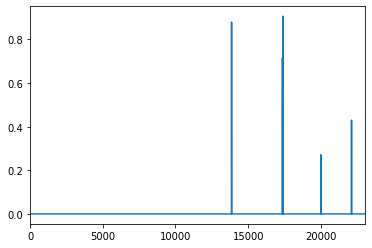

In [22]:
tf["break"].plot()

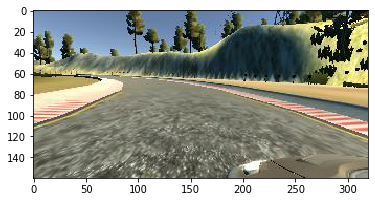

In [23]:
img = Image.open(tf["left"][0])
plt.imshow(img)

In [24]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [25]:
def loadimage(fname):
    return np.asarray(Image.open(fname))

In [26]:
def processImage(img):
    return img[10:130:2, ::4,:]

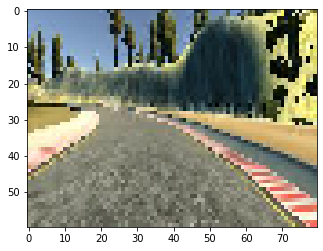

In [27]:
img = processImage(loadimage(tf["center"][0]))
plt.imshow(img)

In [39]:
X = [processImage(loadimage(fname)) for fname in tf["center"]]
X += [processImage(loadimage(fname)) for fname in tf["left"]]
X += [processImage(loadimage(fname)) for fname in tf["right"]]
y = np.array(tf["steering_angle"])
y = np.concatenate([y, y+0.4, y-0.4])

In [44]:
X = np.array(X)
print(X.shape)
print(y.shape)

(69093, 60, 80, 3)
(69093,)


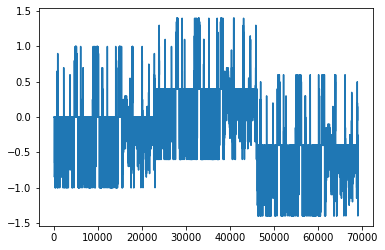

In [32]:
plt.plot(y)
plt.show();

In [45]:
X1 = np.split(X,9)

In [48]:
X1[0]

array([[[[125, 154, 194],
         [123, 152, 192],
         [122, 151, 191],
         ...,
         [217, 213, 149],
         [155, 148,  67],
         [109, 104,  36]],

        [[128, 157, 197],
         [127, 156, 196],
         [125, 154, 194],
         ...,
         [147, 140,  68],
         [255, 255, 172],
         [234, 229, 137]],

        [[131, 160, 200],
         [129, 158, 198],
         [127, 156, 196],
         ...,
         [255, 248, 176],
         [255, 255, 179],
         [251, 246, 144]],

        ...,

        [[147, 148, 132],
         [136, 137, 121],
         [133, 134, 118],
         ...,
         [244, 254, 227],
         [255, 249, 233],
         [252, 244, 233]],

        [[145, 146, 130],
         [155, 156, 140],
         [108, 109,  93],
         ...,
         [217, 122, 104],
         [241, 126, 105],
         [236, 116,  89]],

        [[151, 153, 139],
         [108, 110,  96],
         [ 85,  87,  73],
         ...,
         [255, 186, 171],
        

In [49]:
Y1 = np.split(y,9)

[array([[[[125, 154, 194],
          [123, 152, 192],
          [122, 151, 191],
          ...,
          [217, 213, 149],
          [155, 148,  67],
          [109, 104,  36]],
 
         [[128, 157, 197],
          [127, 156, 196],
          [125, 154, 194],
          ...,
          [147, 140,  68],
          [255, 255, 172],
          [234, 229, 137]],
 
         [[131, 160, 200],
          [129, 158, 198],
          [127, 156, 196],
          ...,
          [255, 248, 176],
          [255, 255, 179],
          [251, 246, 144]],
 
         ...,
 
         [[147, 148, 132],
          [136, 137, 121],
          [133, 134, 118],
          ...,
          [244, 254, 227],
          [255, 249, 233],
          [252, 244, 233]],
 
         [[145, 146, 130],
          [155, 156, 140],
          [108, 109,  93],
          ...,
          [217, 122, 104],
          [241, 126, 105],
          [236, 116,  89]],
 
         [[151, 153, 139],
          [108, 110,  96],
          [ 85,  87,  73],
   

In [54]:
for i in range(9):
    np.save(fr'd:\Autonomik\X{i}.npy',X1[i])
    np.save(fr'd:\Autonomik\Y{i}.npy',Y1[i])
